<a href="https://colab.research.google.com/github/sreejithsathyan/BIGdata/blob/main/CA4_Chunkinng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.	Load the weather station data using pandas read_fwf which will load fixed-column width data into a dataframe. 

In [ ]:
import pandas as pd
from pandas import DataFrame


In [ ]:
# A list of pairs (tuples) giving the extents of the fixed-width fields of each line as half-open intervals (i.e., [from, to[ ).
colspecs  = [(0,11),(12,20),(21,30),(31,37),(38,40),(41,71),(72,75),(76,79),(80,85)]

# Adding headers
heading = ['ID','LATITUDE','LONGITUDE','ELEVATION','STATE','NAME','GSN_FLAG','HCN_CRN_FLAG','WMO_ID']

In [ ]:
# Read station data with headers and  column width size
data = pd.read_fwf('ghcnd-stations.txt', names=heading,colspecs = colspecs)

# print first 5 lines of data
data.head()

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSN_FLAG,HCN_CRN_FLAG,WMO_ID
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217.0


In [ ]:
#Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114789 entries, 0 to 114788
Data columns (total 9 columns):
ID              114789 non-null object
LATITUDE        114789 non-null float64
LONGITUDE       114789 non-null float64
ELEVATION       114789 non-null float64
STATE           70812 non-null object
NAME            114789 non-null object
GSN_FLAG        991 non-null object
HCN_CRN_FLAG    1451 non-null object
WMO_ID          8086 non-null float64
dtypes: float64(4), object(5)
memory usage: 7.9+ MB


In [ ]:
df = DataFrame(data, columns= ['ID','GSN_FLAG','HCN_CRN_FLAG'])
df.head()

,ID,GSN_FLAG,HCN_CRN_FLAG
0,ACW00011604,NaN,NaN
1,ACW00011647,NaN,NaN
2,AE000041196,GSN,NaN
3,AEM00041194,NaN,NaN
4,AEM00041217,NaN,NaN


In [ ]:
a = df[df.GSN_FLAG.notnull()]
print (a)

                 ID GSN_FLAG HCN_CRN_FLAG
2       AE000041196      GSN          NaN
6       AF000040930      GSN          NaN
10      AG000060390      GSN          NaN
11      AG000060590      GSN          NaN
12      AG000060611      GSN          NaN
...             ...      ...          ...
114761  ZA000067633      GSN          NaN
114766  ZA000067743      GSN          NaN
114772  ZI000067775      GSN          NaN
114782  ZI000067964      GSN          NaN
114787  ZI000067983      GSN          NaN

[991 rows x 3 columns]


In [ ]:
a = df[df.HCN_CRN_FLAG.notnull()]
print (a)

                 ID GSN_FLAG HCN_CRN_FLAG
32509   CAW00064757      NaN          CRN
48520   RSW00037201      NaN          CRN
87467   USC00011084      NaN          HCN
87528   USC00012813      NaN          HCN
87543   USC00013160      NaN          HCN
...             ...      ...          ...
114005  USW00096405      NaN          CRN
114006  USW00096406      NaN          CRN
114007  USW00096407      NaN          CRN
114008  USW00096408      NaN          CRN
114009  USW00096409      NaN          CRN

[1451 rows x 3 columns]


# 2.	Create a subset of the station data that is flagged as being in either GSN, HCN, or CRN 

In [ ]:
# Generate a new dataset which contain GSN, HCN ,CRN
subset = df[(df.GSN_FLAG.notnull()) | (df.HCN_CRN_FLAG.notnull())]

In [ ]:
# print information of new data, size of datset, and random smaple of data obtained
subset.info()
subset.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2428 entries, 2 to 114787
Data columns (total 3 columns):
ID              2428 non-null object
GSN_FLAG        991 non-null object
HCN_CRN_FLAG    1451 non-null object
dtypes: object(3)
memory usage: 75.9+ KB


,ID,GSN_FLAG,HCN_CRN_FLAG
92663,USC00135796,NaN,HCN
106313,USC00428119,NaN,HCN
88774,USC00041614,NaN,HCN
48327,RSM00032150,GSN,NaN
113599,USW00063831,NaN,CRN


 Now we can see a new subset is created with only required fields and data.

In [ ]:
# now iam going to extract ID into a new list variable in python
ID = ['USC00041614','RSM00032150']

In [ ]:
def chunkProcessor(self):
        result = chunkData.loc[(chunkData['id'] == 'USC00041614') | (chunkData['id'] == 'RSM00032150')]
        return result

# 3.	Now you are going to work with the ghcnd_daily.csv

In [ ]:
# fetch data from csv file
fileLoader = pd.read_csv("ghcnd_daily.csv", chunksize=1000000)

# defing list
chunkDataSet = []  

# Each chunk is in dataframe format.
for chunkData in fileLoader: 
    filteredChunkData = chunkProcessor(chunkData)
    chunkDataSet.append(filteredChunkData)
    

C:\Users\Sreejith\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6,10,18,22,34,42,46,50,58,66,74,78,82,86,90,94,98,102,110,114,118,122,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Sreejith\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6,7,10,11,14,15,18,19,22,23,26,27,30,31,34,35,38,39,42,43,46,47,50,51,54,55,58,59,62,63,66,67,70,71,74,75,78,79,82,83,86,87,90,91,94,95,98,99,102,103,106,107,110,111,114,115,118,119,122,123,126,127) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Sreejith\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,10,11,15,19,23,27,30,31,35,39,43,47,51,55,59,63,67,71,75,79,83,87,91,95,99,103,107,111,115,118,119,123,127) have mixed typ

In [ ]:
chunkProcessedData = pd.concat(chunkDataSet)
chunkProcessedData

,id,year,month,element,value1,mflag1,qflag1,sflag1,value2,mflag2,...,qflag29,sflag29,value30,mflag30,qflag30,sflag30,value31,mflag31,qflag31,sflag31
6488352,RSM00032150,1947,1,TMAX,-72,NaN,NaN,r,-108,NaN,...,NaN,r,-20,NaN,NaN,r,-40,NaN,NaN,r
6488353,RSM00032150,1947,2,TMAX,-92,NaN,NaN,r,-71,NaN,...,NaN,NaN,-9999,NaN,NaN,NaN,-9999,NaN,NaN,NaN
6488354,RSM00032150,1947,3,TMAX,-61,NaN,NaN,r,-22,NaN,...,NaN,r,-5,NaN,NaN,r,6,NaN,NaN,r
6488355,RSM00032150,1947,4,TMAX,13,NaN,NaN,r,5,NaN,...,NaN,r,29,NaN,NaN,r,-9999,NaN,NaN,NaN
6488356,RSM00032150,1947,5,TMAX,82,NaN,NaN,r,98,NaN,...,NaN,r,223,NaN,NaN,r,155,NaN,NaN,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7676389,USC00041614,2019,5,TMAX,172,NaN,NaN,7,167,NaN,...,NaN,7,200,NaN,NaN,7,206,NaN,NaN,7
7676390,USC00041614,2019,6,TMAX,239,NaN,NaN,7,261,NaN,...,NaN,NaN,-9999,NaN,NaN,NaN,-9999,NaN,NaN,NaN
7676391,USC00041614,2019,7,TMAX,272,NaN,NaN,7,278,NaN,...,NaN,7,339,NaN,NaN,7,333,NaN,NaN,7
7676392,USC00041614,2019,8,TMAX,328,NaN,NaN,7,333,NaN,...,NaN,7,328,NaN,NaN,7,333,NaN,NaN,7


In [ ]:
# for extented view of data
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
chunkProcessedData.head(2)

,id,year,month,element,value1,mflag1,qflag1,sflag1,value2,mflag2,qflag2,sflag2,value3,mflag3,qflag3,sflag3,value4,mflag4,qflag4,sflag4,value5,mflag5,qflag5,sflag5,value6,mflag6,qflag6,sflag6,value7,mflag7,qflag7,sflag7,value8,mflag8,qflag8,sflag8,value9,mflag9,qflag9,sflag9,value10,mflag10,qflag10,sflag10,value11,mflag11,qflag11,sflag11,value12,mflag12,qflag12,sflag12,value13,mflag13,qflag13,sflag13,value14,mflag14,qflag14,sflag14,value15,mflag15,qflag15,sflag15,value16,mflag16,qflag16,sflag16,value17,mflag17,qflag17,sflag17,value18,mflag18,qflag18,sflag18,value19,mflag19,qflag19,sflag19,value20,mflag20,qflag20,sflag20,value21,mflag21,qflag21,sflag21,value22,mflag22,qflag22,sflag22,value23,mflag23,qflag23,sflag23,value24,mflag24,qflag24,sflag24,value25,mflag25,qflag25,sflag25,value26,mflag26,qflag26,sflag26,value27,mflag27,qflag27,sflag27,value28,mflag28,qflag28,sflag28,value29,mflag29,qflag29,sflag29,value30,mflag30,qflag30,sflag30,value31,mflag31,qflag31,sflag31
6488352,RSM00032150,1947,1,TMAX,-72,NaN,NaN,r,-108,NaN,NaN,r,-144,NaN,NaN,r,-132,NaN,NaN,r,-86,NaN,NaN,r,-77,NaN,NaN,r,-118,NaN,NaN,r,-104,NaN,NaN,r,-56,NaN,NaN,r,-22,NaN,NaN,r,-23,NaN,NaN,r,-23,NaN,NaN,r,-27,NaN,NaN,r,-69,NaN,NaN,r,-110,NaN,NaN,r,-109,NaN,NaN,r,-61,NaN,NaN,r,-78,NaN,NaN,r,-105,NaN,NaN,r,-72,NaN,NaN,r,-10,NaN,NaN,r,-9,NaN,NaN,r,-25,NaN,NaN,r,-63,NaN,NaN,r,-24,NaN,NaN,r,-20,NaN,NaN,r,-92,NaN,NaN,r,-90,NaN,NaN,r,-56,NaN,NaN,r,-20,NaN,NaN,r,-40,NaN,NaN,r
6488353,RSM00032150,1947,2,TMAX,-92,NaN,NaN,r,-71,NaN,NaN,r,-20,NaN,NaN,r,13,NaN,NaN,r,-13,NaN,NaN,r,-44,NaN,NaN,r,-79,NaN,NaN,r,-53,NaN,NaN,r,-85,NaN,NaN,r,-116,NaN,NaN,r,-149,NaN,NaN,r,-96,NaN,NaN,r,-52,NaN,NaN,r,-32,NaN,NaN,r,-4,NaN,NaN,r,-27,NaN,NaN,r,-32,NaN,NaN,r,-30,NaN,NaN,r,-54,NaN,NaN,r,-62,NaN,NaN,r,-45,NaN,NaN,r,-39,NaN,NaN,r,-5,NaN,NaN,r,-22,NaN,NaN,r,-84,NaN,NaN,r,-49,NaN,NaN,r,-51,NaN,NaN,r,-46,NaN,NaN,r,-9999,NaN,NaN,NaN,-9999,NaN,NaN,NaN,-9999,NaN,NaN,NaN


In [ ]:
# Avoiding unwanted data from dataset
values = DataFrame(chunkProcessedData, columns= ['id','year','month','element','value1','value2','value3','value4','value5','value6','value7','value8','value9','value10','value11','value12','value13','value14','value15','value16','value17','value18','value19','value20','value21','value22','value23','value24','value25','value26','value27','value28','value29','value30','value31'])
values


,id,year,month,element,value1,value2,value3,value4,value5,value6,value7,value8,value9,value10,value11,value12,value13,value14,value15,value16,value17,value18,value19,value20,value21,value22,value23,value24,value25,value26,value27,value28,value29,value30,value31
6488352,RSM00032150,1947,1,TMAX,-72,-108,-144,-132,-86,-77,-118,-104,-56,-22,-23,-23,-27,-69,-110,-109,-61,-78,-105,-72,-10,-9,-25,-63,-24,-20,-92,-90,-56,-20,-40
6488353,RSM00032150,1947,2,TMAX,-92,-71,-20,13,-13,-44,-79,-53,-85,-116,-149,-96,-52,-32,-4,-27,-32,-30,-54,-62,-45,-39,-5,-22,-84,-49,-51,-46,-9999,-9999,-9999
6488354,RSM00032150,1947,3,TMAX,-61,-22,-3,-15,-14,-33,-59,-28,-41,-55,-39,-12,-11,10,-46,1,-7,-7,20,5,12,-54,-23,41,38,7,45,46,36,-5,6
6488355,RSM00032150,1947,4,TMAX,13,5,2,40,66,73,88,75,80,44,27,73,93,97,107,135,86,47,128,85,30,33,60,45,55,83,100,25,4,29,-9999
6488356,RSM00032150,1947,5,TMAX,82,98,153,171,156,153,154,111,115,211,216,171,108,107,193,160,137,106,74,151,156,168,69,132,173,155,129,104,211,223,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7676389,USC00041614,2019,5,TMAX,172,167,189,-9999,-9999,167,228,-9999,233,211,-9999,-9999,278,261,239,144,128,161,89,128,133,83,139,172,194,-9999,-9999,172,194,200,206
7676390,USC00041614,2019,6,TMAX,239,261,283,283,300,-9999,228,-9999,-9999,228,289,311,311,289,-9999,-9999,311,306,306,283,217,-9999,-9999,267,272,256,239,217,-9999,-9999,-9999
7676391,USC00041614,2019,7,TMAX,272,278,261,-9999,267,-9999,-9999,311,283,306,311,328,339,-9999,333,306,-9999,-9999,256,317,311,350,333,322,322,344,322,339,333,339,333
7676392,USC00041614,2019,8,TMAX,328,333,328,-9999,350,344,-9999,311,322,-9999,-9999,283,200,244,289,333,-9999,-9999,333,339,333,317,272,-9999,339,328,322,344,356,328,333


# 4  calculate monthly averge and add new column avgTemp 

In [ ]:
#Now get i added a new column for average of values1 to values
FinalData['avgTemp'] = FinalData_raw[['value1','value2','value3','value4','value5','value6','value7','value8','value9','value10','value11','value12','value13','value14','value15','value16','value17','value18','value19','value20','value21','value22','value23','value24','value25','value26','value27','value28','value29','value30','value31']].mean(axis=1)
FinalData.tail()

,id,year,month,element,value1,value2,value3,value4,value5,value6,value7,value8,value9,value10,value11,value12,value13,value14,value15,value16,value17,value18,value19,value20,value21,value22,value23,value24,value25,value26,value27,value28,value29,value30,value31,avgTemp
7676389,USC00041614,2019,5,TMAX,172.0,167.0,189.0,NaN,NaN,167.0,228.0,NaN,233.0,211.0,NaN,NaN,278.0,261.0,239.0,144.0,128.0,161.0,89.0,128.0,133.0,83.0,139.0,172.0,194.0,NaN,NaN,172.0,194.0,200.0,206.0,178.666667
7676390,USC00041614,2019,6,TMAX,239.0,261.0,283.0,283.0,300.0,NaN,228.0,NaN,NaN,228.0,289.0,311.0,311.0,289.0,NaN,NaN,311.0,306.0,306.0,283.0,217.0,NaN,NaN,267.0,272.0,256.0,239.0,217.0,NaN,NaN,NaN,271.238095
7676391,USC00041614,2019,7,TMAX,272.0,278.0,261.0,NaN,267.0,NaN,NaN,311.0,283.0,306.0,311.0,328.0,339.0,NaN,333.0,306.0,NaN,NaN,256.0,317.0,311.0,350.0,333.0,322.0,322.0,344.0,322.0,339.0,333.0,339.0,333.0,312.640000
7676392,USC00041614,2019,8,TMAX,328.0,333.0,328.0,NaN,350.0,344.0,NaN,311.0,322.0,NaN,NaN,283.0,200.0,244.0,289.0,333.0,NaN,NaN,333.0,339.0,333.0,317.0,272.0,NaN,339.0,328.0,322.0,344.0,356.0,328.0,333.0,317.041667
7676393,USC00041614,2019,9,TMAX,328.0,322.0,NaN,333.0,339.0,306.0,NaN,NaN,NaN,NaN,222.0,222.0,272.0,300.0,NaN,NaN,NaN,206.0,178.0,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266.250000


In [ ]:
#Extract USC00041614 data

ID_USC00041614 = FinalData[FinalData.values  == "USC00041614"]
ID_USC00041614.head()

,id,year,month,element,value1,value2,value3,value4,value5,value6,value7,value8,value9,value10,value11,value12,value13,value14,value15,value16,value17,value18,value19,value20,value21,value22,value23,value24,value25,value26,value27,value28,value29,value30,value31,avgTemp
7674905,USC00041614,1894,5,TMAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,244.0,228.0,183.0,122.0,83.0,161.0,222.0,239.0,117.0,106.0,156.0,211.0,256.0,283.0,267.0,211.0,128.0,189.0,250.0,278.0,206.0,198.772727
7674906,USC00041614,1894,6,TMAX,267.0,272.0,139.0,144.0,167.0,133.0,128.0,167.0,161.0,56.0,122.0,150.0,178.0,244.0,256.0,217.0,172.0,189.0,217.0,222.0,217.0,261.0,267.0,250.0,200.0,200.0,233.0,250.0,267.0,272.0,NaN,200.600000
7674907,USC00041614,1894,7,TMAX,244.0,283.0,283.0,283.0,289.0,317.0,311.0,317.0,322.0,289.0,256.0,306.0,289.0,278.0,289.0,272.0,283.0,322.0,306.0,306.0,322.0,339.0,339.0,306.0,261.0,239.0,267.0,306.0,294.0,300.0,344.0,295.548387
7674908,USC00041614,1894,8,TMAX,350.0,339.0,283.0,289.0,289.0,261.0,267.0,289.0,294.0,283.0,283.0,289.0,300.0,317.0,317.0,311.0,311.0,300.0,317.0,328.0,294.0,333.0,322.0,328.0,350.0,350.0,311.0,322.0,289.0,289.0,283.0,306.064516
7674909,USC00041614,1894,9,TMAX,211.0,250.0,222.0,289.0,250.0,161.0,211.0,256.0,283.0,294.0,272.0,139.0,150.0,228.0,228.0,250.0,278.0,267.0,261.0,250.0,272.0,261.0,300.0,278.0,211.0,172.0,150.0,172.0,150.0,161.0,NaN,229.233333


In [ ]:
#Extract RSM00032150 data

ID_RSM00032150 = FinalData[FinalData.values  == "RSM00032150"]
ID_RSM00032150.head()

,id,year,month,element,value1,value2,value3,value4,value5,value6,value7,value8,value9,value10,value11,value12,value13,value14,value15,value16,value17,value18,value19,value20,value21,value22,value23,value24,value25,value26,value27,value28,value29,value30,value31,avgTemp
6488352,RSM00032150,1947,1,TMAX,-72.0,-108.0,-144.0,-132.0,-86.0,-77.0,-118.0,-104.0,-56.0,-22.0,-23.0,-23.0,-27.0,-69.0,-110.0,-109.0,-61.0,-78.0,-105.0,-72.0,-10.0,-9.0,-25.0,-63.0,-24.0,-20.0,-92.0,-90.0,-56.0,-20.0,-40.0,-65.967742
6488353,RSM00032150,1947,2,TMAX,-92.0,-71.0,-20.0,13.0,-13.0,-44.0,-79.0,-53.0,-85.0,-116.0,-149.0,-96.0,-52.0,-32.0,-4.0,-27.0,-32.0,-30.0,-54.0,-62.0,-45.0,-39.0,-5.0,-22.0,-84.0,-49.0,-51.0,-46.0,NaN,NaN,NaN,-51.392857
6488354,RSM00032150,1947,3,TMAX,-61.0,-22.0,-3.0,-15.0,-14.0,-33.0,-59.0,-28.0,-41.0,-55.0,-39.0,-12.0,-11.0,10.0,-46.0,1.0,-7.0,-7.0,20.0,5.0,12.0,-54.0,-23.0,41.0,38.0,7.0,45.0,46.0,36.0,-5.0,6.0,-8.645161
6488355,RSM00032150,1947,4,TMAX,13.0,5.0,2.0,40.0,66.0,73.0,88.0,75.0,80.0,44.0,27.0,73.0,93.0,97.0,107.0,135.0,86.0,47.0,128.0,85.0,30.0,33.0,60.0,45.0,55.0,83.0,100.0,25.0,4.0,29.0,NaN,60.933333
6488356,RSM00032150,1947,5,TMAX,82.0,98.0,153.0,171.0,156.0,153.0,154.0,111.0,115.0,211.0,216.0,171.0,108.0,107.0,193.0,160.0,137.0,106.0,74.0,151.0,156.0,168.0,69.0,132.0,173.0,155.0,129.0,104.0,211.0,223.0,155.0,145.225806


In [ ]:
# check length of dataset
len(ID_USC00041614)


1489

In [ ]:
# check length of dataset
len(ID_RSM00032150)

864

# 5 Ploting  Temperature vs time garph & regression line 

In [ ]:
# import necessory package for ploting
import seaborn as sns
import matplotlib.pyplot as plt


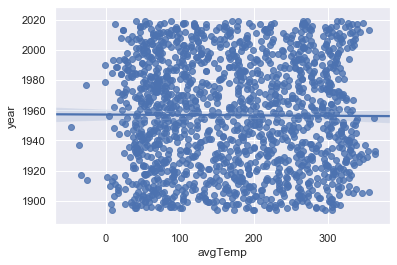

In [ ]:
# plot ID_USC00041614
sns.set(color_codes=True)
sns.regplot(x="avgTemp", y="year", data=ID_USC00041614);

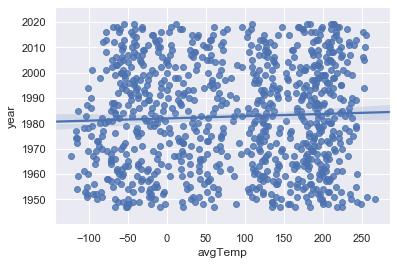

In [ ]:
#plot ID_RSM00032150
sns.set(color_codes=True)
sns.regplot(x="avgTemp", y="year", data=ID_RSM00032150);
